## <center>Automatic Differentiation</center>

Calculating gradients are crucials in Machine Learning as they are necessary for optimizing the loss functions. There are few ways of calculating the gradients:

<u>**Symbolic Differentiation**</u>
Symbolic differentiations are the most common way of calculating gradients. You can apply the law of derivatives to differentiate a function and get the derivative functions. Here is how a typical result for symbolic differentiation look like. As I menetioned, they can be calucalted by doing tedius calculations. Softwares like Mathematica use this particular method. 

![Images](https://raw.githubusercontent.com/mandalbiswadip/Tensorflow_two_notes/master/resources/symbolic_diff.png?token=AEG7MVC4BTST4SBGJIN47VLAJL22C)

**Source: [Mathematica](https://www.wolfram.com/mathematica/)**<br><br>

**<u>Numerical Differentiation</u>**
Numerical differentitation is another technique to estimate gradients. The simplest and most popular way is to use the **finite difference** method:
![finite difference](https://raw.githubusercontent.com/mandalbiswadip/Tensorflow_two_notes/master/resources/finite_difference.png?token=AEG7MVA4MEVSHQVFDZP4RHDAJL234)

Source: [Wikipedia](https://en.wikipedia.org/wiki/Finite_difference_method)

If one uses a small enough `h`, gradient at point `x=a` can be estimated. Note that we don't have to actually differentiate the function like we do for symbolic differentiation. We just need to know the value of `f(x)` in the neighbourhood of `a`

**What is Automatic Differentiation ?**

Automatic Differentiation is a technique to calculate gradients. This is done in tensorflow using the computational graph. Each **node** in the graph represent a tensorflow operation and edges represent tensors. It is possible using the **chain rule** of differentiation to calculate local gradients of each node and multiply the gradients using the chain rule to get the actual gradient. 

Here is an example. Its shows how automatic differentitation is calculated and flows through for using the **chain rule**


![Images](https://raw.githubusercontent.com/mandalbiswadip/Tensorflow_two_notes/master/resources/derivative_autodiff.png?token=AEG7MVH5IWWF4CRIUAMV26TAJL25S)


## Using AutoDiff

### **Gradient Tapes**

Gradient tapes are essential to computing gradients in tensorflow



In [34]:
import tensorflow as tf
import numpy as np

In [16]:
x = tf.Variable(100.0)

You can think of ```GradientTape``` as a recorder or a tape that records or watches the operations(or equations to be more generic)

In [19]:
with tf.GradientTape() as tape:
    
    y = x**3

Now we can compute the gradient of `y` with respect to `x` at `x=100`

In [21]:
tape.gradient(target=y, sources=x)

<tf.Tensor: shape=(), dtype=float32, numpy=30000.0>

at `x=100`<br> `dy/dx = 3*x^2 = 3*100^2 = 30000`

We can pass multiple variables and get multiple gradients for each one

In [30]:
x = tf.Variable(10.)
z = tf.Variable(4.)

In [31]:
with tf.GradientTape() as tape:
    
    y = x**3 + z**2

In [32]:
tape.gradient(target=y, sources=[x, z])

[<tf.Tensor: shape=(), dtype=float32, numpy=300.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=8.0>]



**partial derivative of y with respect to x = 3xx^2 = 3x10^2 = 300.0**<br>
**partial derivative of y with respect to z = 2xz = 2x4 = 8.0**

The gradients can be calculated with respect to multi dimensional arrays as well

In [41]:
x = tf.Variable(np.random.random((3,4)))
x

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float64, numpy=
array([[0.85733164, 0.72450839, 0.01000471, 0.53435523],
       [0.8112967 , 0.8668377 , 0.02962584, 0.92548695],
       [0.77581414, 0.59835021, 0.65323683, 0.44299535]])>

In [43]:
with tf.GradientTape() as tape:
    
    y = x**2

In [45]:
tape.gradient(target=y, sources=x)

<tf.Tensor: shape=(3, 4), dtype=float64, numpy=
array([[1.71466328, 1.44901678, 0.02000943, 1.06871045],
       [1.6225934 , 1.7336754 , 0.05925167, 1.85097391],
       [1.55162829, 1.19670042, 1.30647367, 0.8859907 ]])>

The gradient refers to the following matrix


![Images](../resources/download.png)


The gradient shape will be the Variable shape. In this case it's `(3,4)`

## tf.GradientTape.watch()

`tf.GradientTape.watch` is used if you want to calculate gradients for `Tensors`

In [73]:
x = tf.constant(3.0)

In [74]:
with tf.GradientTape() as tape:
    tape.watch(x)
    y = x**3

tape.gradient(y,x)

<tf.Tensor: shape=(), dtype=float32, numpy=27.0>

### Important Flags

`watch_accessed_variables`:<br>
By setting this variable False, you can bypass the defualt behaviour of considering all `tf.Variable`s for gradient. You can manually watch variable to using `tf.GradientTape.watch(x)`

For example,

In [67]:

x = tf.Variable(1.)
y = tf.Variable(20.)

with tf.GradientTape(watch_accessed_variables=False) as tape:
    tape.watch(x)
    f = 3*y**2 + 4*x**3

The following will produce valid output 
```
tape.gradient(target=f, sources=x)
>> <tf.Tensor: shape=(), dtype=float32, numpy=12.0>
```
While this will raise an error
```
tape.gradient(target=f, sources=y)
```

`persistent`<br>
If you want to use the same tape to calculate the gradient multiple times using the `persistent = True` flag

#### **If the target variable is matrix, GradientTape computes the gradient with respect to sum of the target variable**

In [79]:
x = tf.Variable(5.)

with tf.GradientTape() as tape:
     y = [3., 4.]*x

In [81]:
tape.gradient(target=y, sources=x)

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

### Important Note:
**Control flow**

As the gradients of the operations are calculated independently, control flow can handled by gradient tapes

## Example of Gradient Descent 

We try to optimize the following functions using gradient tapes: `y = 4x^2 + 100`

In [85]:
lr = 0.0001

In [86]:
x_data = []
y_data = []

In [87]:
lr = 0.00001

In [114]:
x = tf.Variable(5.)

In [119]:
for _ in range(10000):
    with tf.GradientTape() as tape:
        tape.watch(x)
        y = 4*x**2 + 100
    
    grad = tape.gradient(y,x)
    x = x - lr*grad
    x_data.append(x.numpy())
    y_data.append(y.numpy())

In [140]:
y

<tf.Tensor: shape=(), dtype=float32, numpy=100.23665>

In [141]:
x

<tf.Tensor: shape=(), dtype=float32, numpy=0.24321193>

### Plot

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams["figure.figsize"] = (15,10)
%matplotlib inline

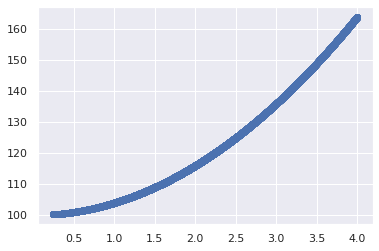

In [144]:
plt.scatter(x_data, y_data, alpha=0.5)
# plt.show()

In [146]:
y

<tf.Tensor: shape=(), dtype=float32, numpy=100.23665>